# データの作成
http://www.ph.ucla.edu/epi/snow/table12a.html

In [1]:
import pandas as pd


# 1849年におけるエリア毎のコレラによる死者数
# Southwark and Vauxhall Company
sv1849 = [283,157,192,249,259,226,352,97,111,8,235,92]
# Lambeth Company & Southwark and Vauxhall Company
lsv1849 = [256,267,312,257,318,446,143,193,243,215,544,187,153,81,113,176]

# 1849年におけるエリア毎のコレラによる死者数
# Southwark and Vauxhall Company
sv1854 = [371, 161, 148, 362, 244, 237, 282, 59, 171, 9, 240, 174]
# Lambeth Company & Southwark and Vauxhall Company
lsv1854 = [113,174,270,93,210,388,92,58,117,49,193,303,142,48,165,132]

# コレラの死者数を会社ごとにまとめる
sv_death = sv1849 + sv1854
lsv_death = lsv1849 + lsv1854

# どのデータがどのエリアのものか
sv_area = [f'sv_{i}' for i in range(1, len(sv1849)+1)] + [f'sv_{i}' for i in range(1, len(sv1854)+1)]
lsv_area = [f'lsv_{i}' for i in range(1, len(lsv1849)+1)] + [f'lsv_{i}' for i in range(1, len(lsv1854)+1)]

# どのデータがどの年のものか
sv_year = [1849 for i in range(len(sv1849))] + [1854 for i in range(len(sv1854))]
lsv_year = [1849 for i in range(len(lsv1849))] + [1854 for i in range(len(lsv1854))]

# Southwark & Vauxhallのデータフレームを作成
sv = pd.DataFrame({
    'area': sv_area,
    'year': sv_year,
    'death': sv_death,
    'LSV': 0,
    'company': 'Southwark and Vauxhall'
})
# Lambeth & Southwark and Vauxhallのデータフレームを作成
lsv = pd.DataFrame({
    'area': lsv_area,
    'year': lsv_year,
    'death': lsv_death,
    'LSV': 1,
    'company': 'Lambeth & Southwark and Vauxhall'
})

# 地域・年別のデータセットの作成
JS_df = pd.concat([sv, lsv], ignore_index=True)

## 会社別のデータセットを作成
JS_sum = JS_df.groupby(['company', 'LSV', 'year'], as_index=False).death.sum()

# 集計による推定

In [2]:
JS_grp_summary = (
    JS_sum.pivot_table(
        index=['company', 'LSV'], columns=['year'], values='death',  aggfunc='sum',
        )
    .add_prefix('year_').reset_index()
)
JS_grp_summary['gap'] = JS_grp_summary['year_1854'] - JS_grp_summary['year_1849']
JS_grp_summary['gap_rate'] = JS_grp_summary['year_1854'] / JS_grp_summary['year_1849'] - 1
JS_grp_summary

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,3904,2547,-1357,-0.347592
1,Southwark and Vauxhall,0,2261,2458,197,0.087130


In [3]:
import numpy as np

JS_grp_summary_ln = (
    JS_sum.pivot_table(
        index=['company', 'LSV'], columns=['year'], values='death', aggfunc=np.log
    )
    .add_prefix('year_').reset_index()
)

JS_grp_summary_ln['gap'] = JS_grp_summary_ln['year_1854'] - JS_grp_summary_ln['year_1849']
JS_grp_summary_ln

year,company,LSV,year_1849,year_1854,gap
0,Lambeth & Southwark and Vauxhall,1,8.269757,7.842671,-0.427085
1,Southwark and Vauxhall,0,7.723562,7.807103,0.083541


In [4]:
# 可視化
%matplotlib inline
import matplotlib.pyplot as plt

JS_grp_summary

year,company,LSV,year_1849,year_1854,gap,gap_rate
0,Lambeth & Southwark and Vauxhall,1,3904,2547,-1357,-0.347592
1,Southwark and Vauxhall,0,2261,2458,197,0.087130


In [5]:
y1849_treat = JS_grp_summary[JS_grp_summary['LSV'] == 1]['year_1849'].values[0]
y1854_treat = JS_grp_summary[JS_grp_summary['LSV'] == 1]['year_1854'].values[0]
y1849_control = JS_grp_summary[JS_grp_summary['LSV'] == 0]['year_1849'].values[0]
y1854_control = JS_grp_summary[JS_grp_summary['LSV'] == 0]['year_1854'].values[0]
trend_gap = JS_grp_summary[JS_grp_summary['LSV'] == 0]['gap']

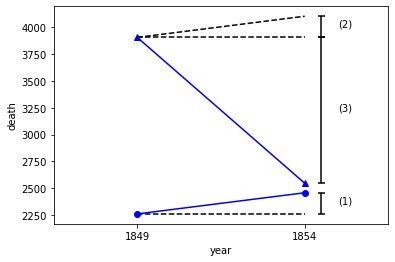

In [7]:
plt.plot([0, 1], [y1849_treat, y1849_treat + trend_gap], 'k--')

plt.plot([0, 1], [y1849_treat, y1849_treat], 'k--')
plt.plot([0, 1], [y1849_control, y1849_control], 'k--')

plt.plot([0, 1], [y1849_treat, y1854_treat], '^b-')
plt.plot([0, 1], [y1849_control, y1854_control], 'ob-')

plt.vlines(1.1, y1849_control, y1849_control + trend_gap)
plt.hlines(y1849_control, 1.08, 1.12)
plt.hlines(y1849_control + trend_gap, 1.08, 1.12)
plt.text(1.2, (y1849_control + y1849_control + trend_gap)/2, s='(1)')

plt.vlines(1.1, y1849_treat, y1849_treat + trend_gap)
plt.hlines(y1849_treat, 1.08, 1.12)
plt.hlines(y1849_treat + trend_gap, 1.08, 1.12)
plt.text(1.2, (y1849_treat + y1849_treat + trend_gap)/2, s='(2)')

plt.vlines(1.1, y1849_treat, y1854_treat)
plt.hlines(y1849_treat, 1.08, 1.12)
plt.hlines(y1854_treat, 1.08, 1.12)
plt.text(1.2, (y1849_treat + y1854_treat)/2, s='(3)')

plt.xlabel('year')
plt.xlim([-0.5, 1.5])
plt.xticks([0, 1], [1849, 1854])
plt.ylabel('death')
plt.show()

# 回帰分析による推定

In [8]:
JS_did = JS_sum.copy()
JS_did['D1854'] = JS_did['year'].apply(lambda x: 1 if x == 1854 else 0)
# JS_did['D1854_LSV'] = JS_did['D1854'] * JS_did['LSV']  # モデル式で定義できる
JS_did['log_death'] = np.log(JS_did['death'])

JS_did_area = JS_df.copy()
JS_did_area['D1854'] = JS_did_area.year.apply(lambda x: 1 if x == 1854 else 0)
# JS_did_area['D1854_LSV'] = JS_did_area['D1854'] * JS_did_area['LSV']
JS_did_area['log_death'] = np.log(JS_did_area['death'])

In [9]:
from statsmodels.formula.api import ols

model = ols('death ~ LSV + D1854 + D1854:LSV', data=JS_did).fit()
model.summary().tables[1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/lo

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2261.0000,inf,0,nan,nan,nan
LSV,1643.0000,inf,0,nan,nan,nan
D1854,197.0000,inf,0,nan,nan,nan
D1854:LSV,-1554.0000,inf,-0,nan,nan,nan


In [10]:
model = ols('log_death ~ LSV + D1854 + D1854:LSV', data=JS_did).fit()
model.summary().tables[1]

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.7236,inf,0,nan,nan,nan
LSV,0.5462,inf,0,nan,nan,nan
D1854,0.0835,inf,0,nan,nan,nan
D1854:LSV,-0.5106,inf,-0,nan,nan,nan


In [11]:
model = ols('death ~ LSV + area + D1854 + D1854:LSV', data=JS_did_area).fit()
results = pd.read_html(model.summary().tables[1].as_html(),  header=0, )[0]
results[~results['Unnamed: 0'].str.startswith('area')]

,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,177.7076,15.710,11.312,0.000,145.415,210.000
28,LSV,49.1987,44.773,1.099,0.282,-42.833,141.230
29,D1854,16.4167,25.365,0.647,0.523,-35.721,68.555
30,D1854:LSV,-101.2292,33.554,-3.017,0.006,-170.201,-32.257


In [12]:
model = ols('log_death ~ LSV + area + D1854 + D1854:LSV', data=JS_did_area).fit()
results = pd.read_html(model.summary().tables[1].as_html(),  header=0, )[0]
results[~results['Unnamed: 0'].str.startswith('area')]

,Unnamed: 0,coef,std err,t,P>|t|,[0.025,0.975]
0,Intercept,4.6461,0.082,56.393,0.000,4.477,4.815
28,LSV,0.7363,0.235,3.136,0.004,0.254,1.219
29,D1854,0.0739,0.133,0.556,0.583,-0.200,0.347
30,D1854:LSV,-0.5661,0.176,-3.217,0.003,-0.928,-0.204
